In [2]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1

In [2]:
mat = spio.loadmat('data/MardiaExamData.mat', squeeze_me=True)
data = mat['EXAMS']

In [3]:
X = data[:, :2]
Y = data[:, 2:]
print(X.shape)
print(Y.shape)

(88, 2)
(88, 3)


In [4]:
def CCA(X, Y, mean_substract=False):
    '''
    :param X, Y : input vectors to analyze CCA, 
    '''
    if mean_substract:
        X = X - np.mean(X, axis=0)[None, :]
        Y = Y - np.mean(Y, axis=0)[None, :]
    Qx, Rx = np.linalg.qr(X)
    Qy, Ry = np.linalg.qr(Y)
    phi, s, psi = np.linalg.svd(Qx.T@Qy)
    return phi, s, psi, Qx, Rx, Qy, Ry

In [5]:
phi, s, psi, Qx, Rx, Qy, Ry = CCA(X, Y, True)

In [6]:
a = np.linalg.pinv(Rx)@phi
b = np.linalg.pinv(Ry)@psi

In [7]:
alpha = X@a
beta = Y@b

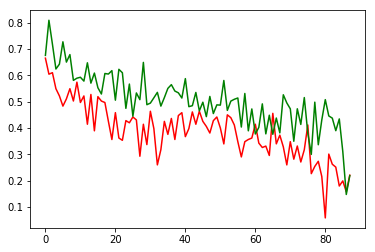

In [8]:
plt.plot(alpha[:, 0], 'r')
plt.plot(beta[:, 0], 'g')
plt.show()

In [17]:
u = Qx@phi
v = Qy@psi

In [24]:
u[:, 0].T@v[:,0] / np.linalg.norm(u[:, 0])/ np.linalg.norm(v[:, 0])

0.65207817867631868

In [23]:
s

array([ 0.66305211,  0.04094594])

# Problem 2

In [3]:
mat = spio.loadmat('data/MNFdata.mat', squeeze_me=True)
X = mat['X']

In [34]:
X = X - np.mean(X, axis=0)

In [35]:
Xs = np.vstack((X[1:, :], X[0, :]))  # shifted X
dX = X - Xs

#### Quesiton a-i

In [36]:
Y = np.linalg.inv(dX.T@dX/2)@X.T@X

In [37]:
w, psi = np.linalg.eig(Y)

In [38]:
phi = X@psi

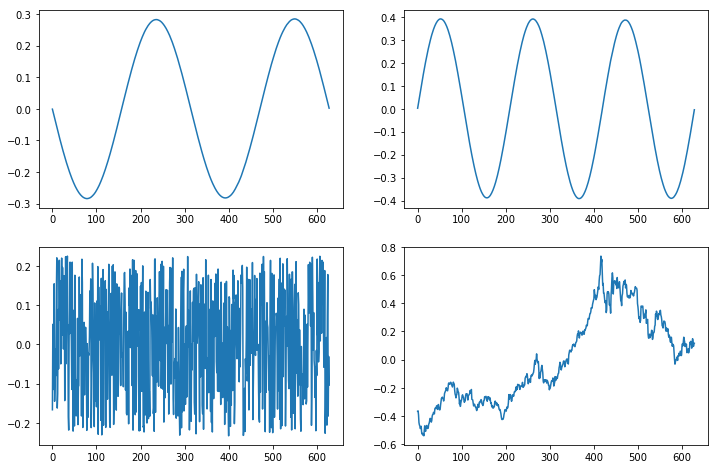

In [39]:
plt.figure(figsize=(12,8))
for i in range(2):
    for j in range(2):
        plt.subplot(2,2, i*2 + j + 1)
        plt.plot(phi[:, i*2+j])
plt.show()

#### Quesiton a-ii

In [40]:
import scipy

In [41]:
C = X.T@X
D = dX.T@dX/2

In [42]:
w, psi = scipy.linalg.eig(C, D)

In [43]:
phi = X@psi

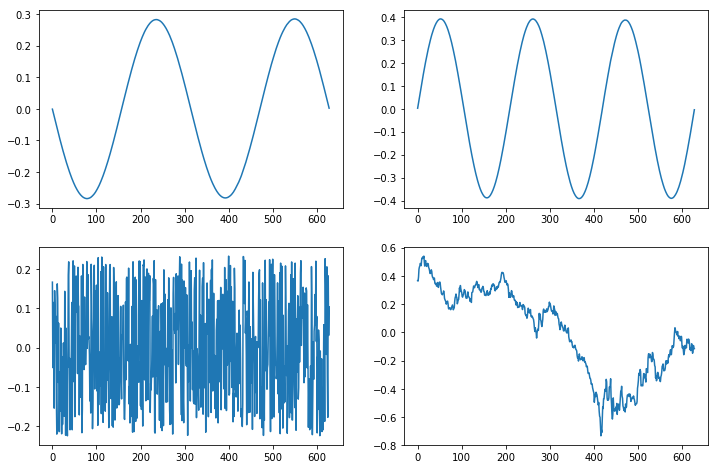

In [44]:
plt.figure(figsize=(12,8))
for i in range(2):
    for j in range(2):
        plt.subplot(2,2, i*2 + j + 1)
        plt.plot(phi[:, i*2+j])
plt.show()

#### Quesiton a-iii

In [15]:
import matlab.engine

ImportError: No module named 'matlab'

## c

In [45]:
u, s, vh = np.linalg.svd(X, full_matrices=False)

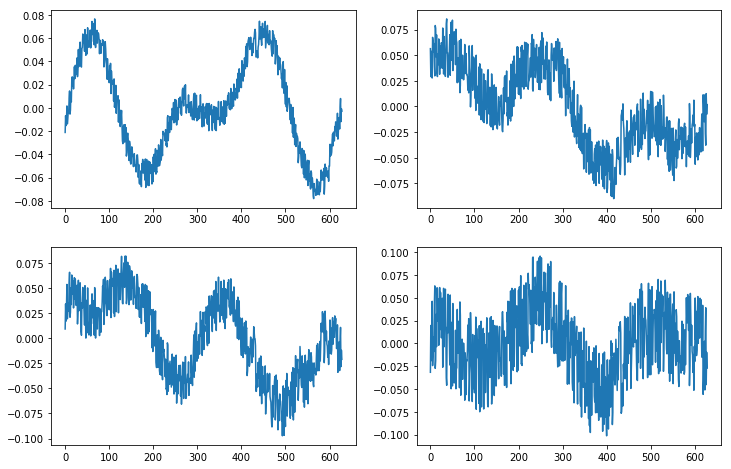

In [46]:
plt.figure(figsize=(12,8))
for i in range(2):
    for j in range(2):
        plt.subplot(2,2, i*2 + j + 1)
        plt.plot(u[:, i*2+j])
plt.show()

## d

In [47]:
B_mnf = phi[:, :2]
B_svd = u[:, :2]

In [48]:
proj_mnf, proj_svd = B_mnf@B_mnf.T@X, B_svd@B_svd.T@X

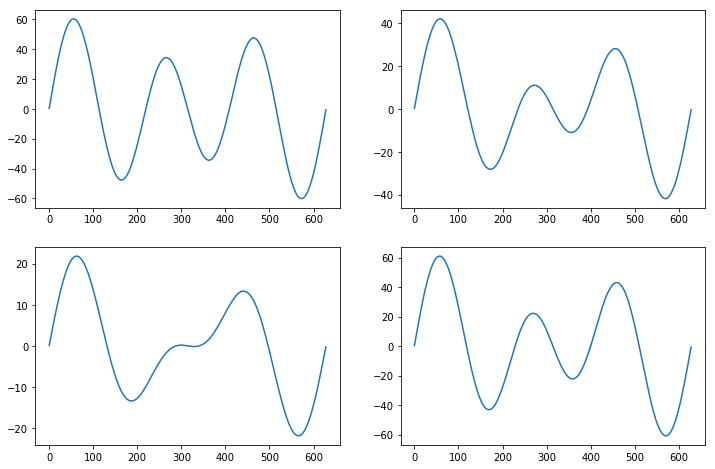

In [49]:
plt.figure(figsize=(12,8))
for i in range(2):
    for j in range(2):
        plt.subplot(2,2, i*2 + j + 1)
        plt.plot(proj_mnf[:, i*2+j])
plt.show()

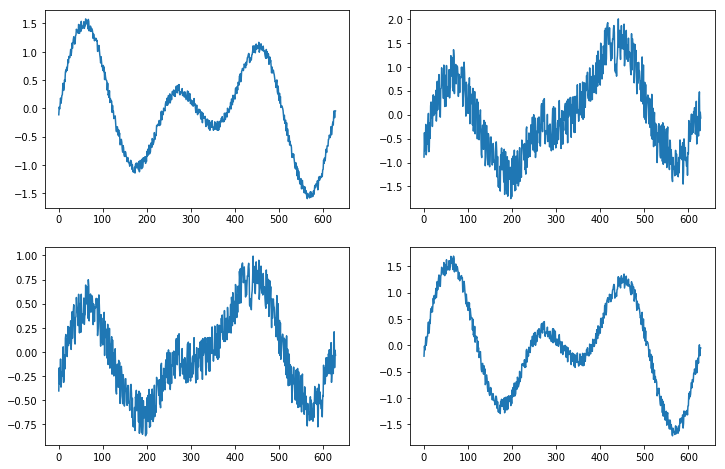

In [50]:
plt.figure(figsize=(12,8))
for i in range(2):
    for j in range(2):
        plt.subplot(2,2, i*2 + j + 1)
        plt.plot(proj_svd[:, i*2+j])
plt.show()